<h1>Iris Classification</h1>

In [1]:
# Importing neccessary modules and packages
import pandas as pd 
import numpy as np
from sklearn import datasets
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.manifold import TSNE

In [2]:
# Loading the dataset
iris = datasets.load_iris()

## Discovering the dataset

In [3]:
#Type of iris object
type(iris) #You can think of Bunch object as an object that's similar to dictionary.

sklearn.utils.Bunch

In [4]:
#Discover what keys are there in iris object.
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
#data - the independent varaibles
print("iris.data represents the matrix of independent variables. The first three rows(observations) are\n {} \n"\
      .format(iris.data[0:3]))
print("The number of observations is {} . \n".format(iris.data.shape[0]))
print("The number of features is {} . \n".format(iris.data.shape[1]))

iris.data represents the matrix of independent variables. The first three rows(observations) are
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] 

The number of observations is 150 . 

The number of features is 4 . 



In [6]:
#Array that contains a label for each observation
print("labels {}".format(iris.target))
print("Number of observations is {} . ".format(len(iris.target)))

labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Number of observations is 150 . 


In [7]:
#label names - categories.
print("label names are {}.".format(iris.target_names))
for index in range(len(iris.target_names)) :
    print("label {} represents {}.".format(index,iris.target_names[index]))

label names are ['setosa' 'versicolor' 'virginica'].
label 0 represents setosa.
label 1 represents versicolor.
label 2 represents virginica.


In [8]:
#The discription of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
#Print the absolute path of the dataset.
print(iris.filename)

C:\Users\Ayman\Anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv


In [10]:
#Print the features' names - columns' names
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
#Buildig the dataframe that represents the dataset.
df = pd.read_csv('C:\\Users\Ayman\Anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv')

In [12]:
#Specify columns' names
df.columns = iris.feature_names + ["class"]

In [13]:
#Show the first five rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
#Another way to load the dataset
df = pd.DataFrame(iris.data ,columns = iris.feature_names)

In [15]:
#Show the first five rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
#Add a lebel(class,target,..etc.) column to the dataframe.
df['class'] = iris.target

In [17]:
#Show the first five rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.085716
[t-SNE] KL divergence after 1000 iterations: 0.121728


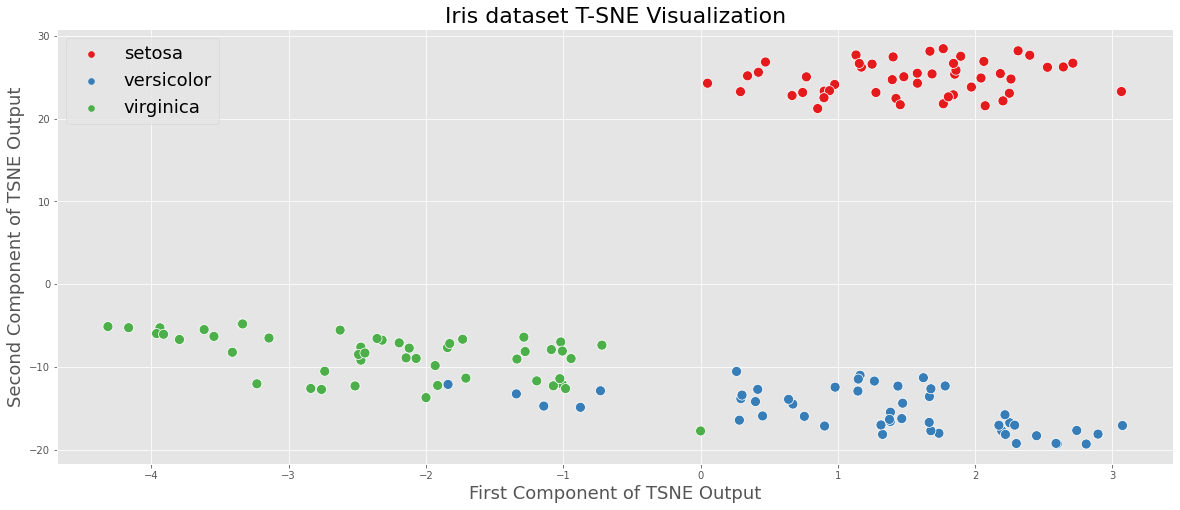

In [18]:
#Visualizing the dataset
x = iris.data
y = iris.target 
tsne = TSNE(n_components=2, verbose=1, random_state=123,n_iter = 1000)
components = tsne.fit_transform(x)
df1 = pd.DataFrame()
labels = iris.target_names[y]
df1["y"] = labels
df1["comp1"] = components[:,0]
df1["comp2"] = components[:,1]

style.use("ggplot")
plt.figure(figsize = (20,8))
plt.title("Iris dataset T-SNE Visualization",fontsize = 22)
plot1 = sns.scatterplot(x="comp1", y="comp2", hue=df1.y.tolist(),palette=sns.color_palette("Set1", n_colors = 3),data=df1,s=100)
plt.xlabel("First Component of TSNE Output",fontsize = 18)
plt.ylabel("Second Component of TSNE Output",fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

<h2>Preparing the data</h2>

In [19]:
#Note : This dataset is already clean, but we'll do here some basic cleaning and exploring stuff.
#Checking for inconsistent column names
print("Checking inconsistent column names : \n")
print(df.columns) #So they're consistent
print("Checked")
print("-------------------------------------------------------------------")
#Checking the type of each columns
print("Checking the type of each column : \n")
print(df.dtypes)
print("Checked")
print("-------------------------------------------------------------------")
#Checking for missing values
print("Checking the existance of null values : \n")
print(df.isnull().sum()) #So there is no missing values
print("Checked")
print("-------------------------------------------------------------------")
#Checking for missing values
print("Checking for more information about the dataset : \n")
print(df.info()) #So there is no missing values
print("Checked")
print("-------------------------------------------------------------------")
#Checking for missing values
print("Checking for more information about the dataset : \n")
print(df.describe()) #So there is no missing values
print("Checked")
print("-------------------------------------------------------------------")

Checking inconsistent column names : 

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')
Checked
-------------------------------------------------------------------
Checking the type of each column : 

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int32
dtype: object
Checked
-------------------------------------------------------------------
Checking the existance of null values : 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64
Checked
-------------------------------------------------------------------
Checking for more information about the dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64

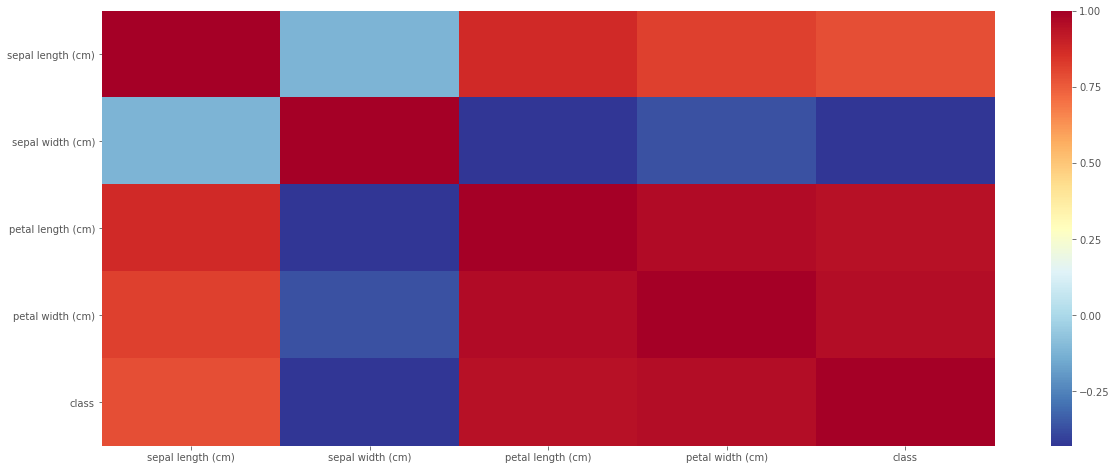

In [20]:
#To show the correlation between each feature and the class.
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(),cmap = 'RdYlBu_r')
plt.grid(False)
plt.show()

<h2>Building Models</h2>

In [21]:
x = df.drop('class',axis = 1).values
y = df['class'].values
print("x is of type {} and is of shape {}.".format(type(x),x.shape))
print("y is of type {} and is of shape {}.".format(type(y),y.shape))

x is of type <class 'numpy.ndarray'> and is of shape (150, 4).
y is of type <class 'numpy.ndarray'> and is of shape (150,).


In [22]:
parameters = [{'n_neighbors': list(range(1,50)), "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
classifier = KNeighborsClassifier()
search = GridSearchCV(classifier,parameters,cv = 5,verbose = 1)
search.fit(x,y)

Fitting 5 folds for each of 196 candidates, totalling 980 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 980 out of 980 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [23]:
best_model = search.best_estimator_
best_parameters = search.best_params_
best_score = search.best_score_
print("The best model is : ",best_model)
print("The best parameters are : ",best_parameters)
print("The best r2 score is : ",best_score)

The best model is :  KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
The best parameters are :  {'algorithm': 'brute', 'n_neighbors': 10}
The best r2 score is :  0.9866666666666667


In [24]:
#Making predictions :
indecies = [0,4,10,50,80,120]
input_x = x[indecies]
output_y = best_model.predict(input_x)
print("Real values      ",y[indecies])
print("Predicted values ",output_y)

Real values       [0 0 0 1 1 2]
Predicted values  [0 0 0 1 1 2]


<h2>7/12/2020</h2>